In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch Version
torch.__version__

'2.8.0+cu126'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = .2
bias = .8

# Create range values
start = 0
end = 1
step = .02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.8000],
         [0.8040],
         [0.8080],
         [0.8120],
         [0.8160],
         [0.8200],
         [0.8240],
         [0.8280],
         [0.8320],
         [0.8360]]))

In [4]:
# Split data
train_split = int(.8 * len(X)) # Splitting data into 80% for training and 20% for testing
X_train = X[:train_split] #Defining that X training starts from 0 to 80% of data
X_test = X[train_split:] # Defining that the remaining data is for testing
y_train = y[:train_split]
y_test = y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [5]:
# Graph Function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # Plots training data, test data and compares predictions
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 20});

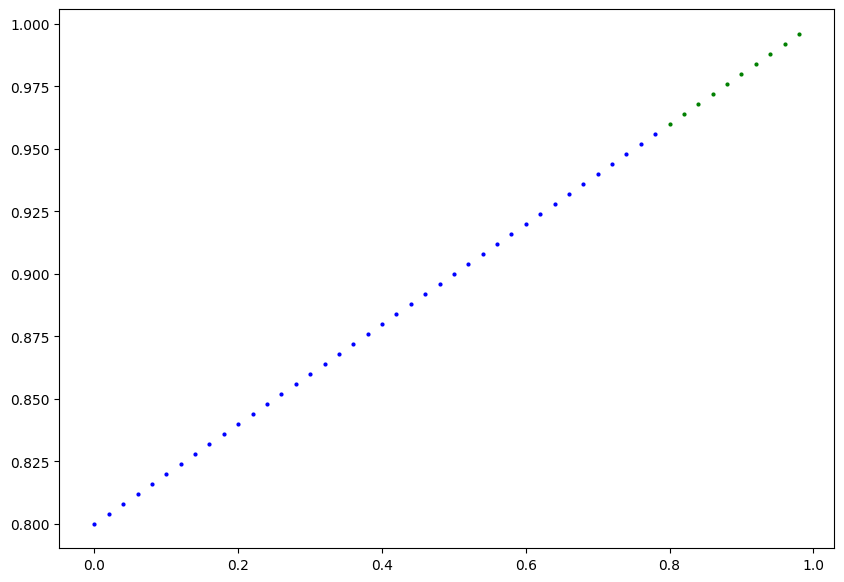

In [6]:
# VISUALIZE
plot_predictions(X_train, y_train, X_test, y_test)

In [7]:
# Building a PyTorch Linear Model
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform
    self.linear_layer = nn.Linear(in_features=1,   # Little shortcut to prev class code, using linear layer. The input is 1 x gets 1 y so the input=1 and output=1
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(87)
model_1 = LinearRegressionModelV2() # Create an instance of the model
model_1, model_1.state_dict() # Call state_dict() on the instance

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.9927]])),
              ('linear_layer.bias', tensor([0.7862]))]))

In [8]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [9]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [10]:
# Setup loss function
loss_fn = nn.L1Loss() # same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [11]:
#Training loop
torch.manual_seed(87)

epochs = 1000

# Put data on the target device (device agnostic code for data)
# X_train = X_train.to(device) # This line is not needed here
# X_test = X_test.to(device) # This line is not needed here
# y_train = y_train.to(device) # This line is not needed here
# y_test = y_test.to(device) # This line is not needed here


for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_pred = model_1(X_train.to(device)) # Move X_train to the device here

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train.to(device)) # Move y_train to the device here

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test.to(device)) # Move X_test to the device here

    test_loss = loss_fn(test_pred, y_test.to(device)) # Move y_test to the device here

  # Print out whats happenin

  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.47899603843688965 | Test loss: 1.0618950128555298
Epoch: 10 | Loss: 0.3809441924095154 | Test loss: 0.9378452301025391
Epoch: 20 | Loss: 0.31424713134765625 | Test loss: 0.8334168195724487
Epoch: 30 | Loss: 0.2691723704338074 | Test loss: 0.7463662624359131
Epoch: 40 | Loss: 0.23882374167442322 | Test loss: 0.6739519238471985
Epoch: 50 | Loss: 0.2186906784772873 | Test loss: 0.6148779988288879
Epoch: 60 | Loss: 0.20521724224090576 | Test loss: 0.5670468807220459
Epoch: 70 | Loss: 0.1957639455795288 | Test loss: 0.5281562209129333
Epoch: 80 | Loss: 0.18883825838565826 | Test loss: 0.49641141295433044
Epoch: 90 | Loss: 0.18355543911457062 | Test loss: 0.47126060724258423
Epoch: 100 | Loss: 0.17904207110404968 | Test loss: 0.45078450441360474
Epoch: 110 | Loss: 0.17504212260246277 | Test loss: 0.43298467993736267
Epoch: 120 | Loss: 0.17116859555244446 | Test loss: 0.41721877455711365
Epoch: 130 | Loss: 0.1676785945892334 | Test loss: 0.4061984121799469
Epoch: 140 | Loss

In [12]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1932]])),
             ('linear_layer.bias', tensor([0.7977]))])

In [13]:
# Turn model into eval mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.9522],
        [0.9561],
        [0.9600],
        [0.9638],
        [0.9677],
        [0.9716],
        [0.9754],
        [0.9793],
        [0.9832],
        [0.9870]])

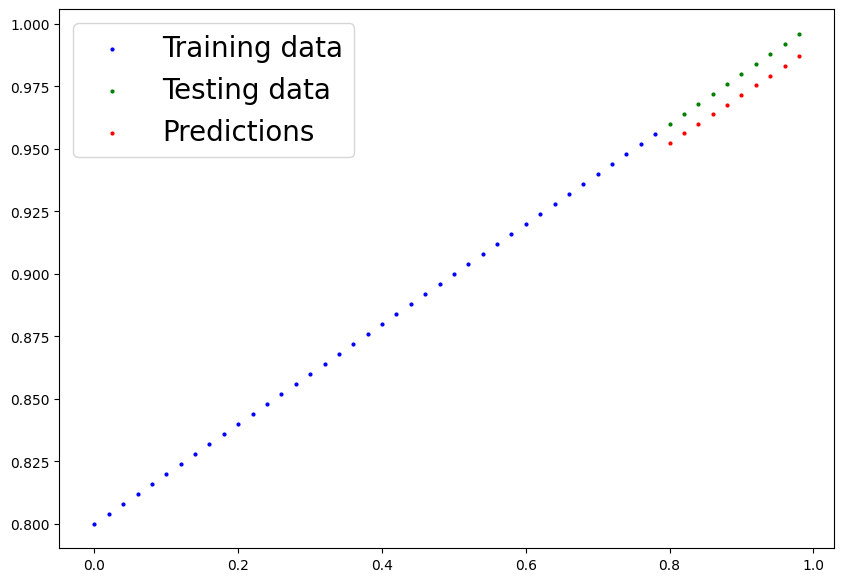

In [14]:
# Check out our model predictions visually
plot_predictions(predictions = y_preds.cpu())